In [1]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os

sys.path.append('/home/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory, NGTSField
from NGTS.GACF_utils import TIME_CONVERSIONS, medsig, rebin_err
from NGTS import NGTSObject

from ngtsio import ngtsio

from tqdm import tqdm as tqdm

In [2]:
XMATCH_LOCATION = '/appch/data/jtb34/NG0004-2950/cross_match/'
FILE_NAME = 'Uncut_Final_NG0004-2950.fits'

FIELDNAME = 'NG0004-2950' 
TEST = 'CYCLE1807'

In [3]:
from astropy.io import fits

In [4]:
# with open(os.path.join(XMATCH_LOCATION, FILE_NAME), 'r') as f:
#     data = fits.open(f)
# data
something = fits.open(os.path.join(XMATCH_LOCATION, FILE_NAME))

In [5]:
tdic = ngtsio.get(fieldname=FIELDNAME, ngts_version=TEST, keys=['OBJ_ID', 'MAG_MEAN'])

('Field name:', 'NG0004-2950')
('NGTS version:', 'CYCLE1807')
('Object IDs (', 3574, '):', array(['000040', '000048', '000049', ..., '021031', '021035', '021041'],
      dtype='|S6'))
###############################################################################
Success: All keys successfully read into dictionary.
###############################################################################


In [6]:
for i in range(len(tdic['OBJ_ID'])):
    print 'NGTS mag: {}, Gaia G mag: {}'.format(tdic['MAG_MEAN'][i], something[1].data['Gaia_Gmag'][i])

NGTS mag: 0.0, Gaia G mag: 15.621
NGTS mag: 0.0, Gaia G mag: 12.7399
NGTS mag: 0.0, Gaia G mag: 15.826
NGTS mag: 0.0, Gaia G mag: 14.4358
NGTS mag: 8.91358184814, Gaia G mag: 14.5345
NGTS mag: 0.0, Gaia G mag: 15.2763
NGTS mag: 7.63036775589, Gaia G mag: 13.2764
NGTS mag: 9.19302177429, Gaia G mag: 14.9162
NGTS mag: 0.0, Gaia G mag: 15.4973
NGTS mag: 9.48019599915, Gaia G mag: 15.1146
NGTS mag: 0.0, Gaia G mag: 11.2371
NGTS mag: 0.0, Gaia G mag: 11.7625
NGTS mag: 0.0, Gaia G mag: 16.5491
NGTS mag: 0.0, Gaia G mag: 15.9943
NGTS mag: 7.24974632263, Gaia G mag: 12.9132
NGTS mag: 9.93975543976, Gaia G mag: 15.6366
NGTS mag: 6.03134202957, Gaia G mag: 11.805
NGTS mag: 9.65056991577, Gaia G mag: 15.3381
NGTS mag: 9.09160995483, Gaia G mag: 14.6788
NGTS mag: 7.68722677231, Gaia G mag: 13.6209
NGTS mag: 10.8623094559, Gaia G mag: 16.1793
NGTS mag: 9.27095031738, Gaia G mag: 14.8719
NGTS mag: 9.76205253601, Gaia G mag: nan
NGTS mag: 9.58259487152, Gaia G mag: nan
NGTS mag: 9.53948688507, Gaia G

NGTS mag: 6.68965530396, Gaia G mag: 12.4495
NGTS mag: 9.98001670837, Gaia G mag: 15.7563
NGTS mag: 5.69499397278, Gaia G mag: 11.3634
NGTS mag: 9.14809513092, Gaia G mag: 14.8549
NGTS mag: 8.37267780304, Gaia G mag: 14.1297
NGTS mag: 10.1018829346, Gaia G mag: 15.8795
NGTS mag: 10.5236158371, Gaia G mag: 16.4152
NGTS mag: 9.75504016876, Gaia G mag: 15.6556
NGTS mag: 9.92140388489, Gaia G mag: 16.0264
NGTS mag: 8.20009040833, Gaia G mag: 14.0402
NGTS mag: 10.0451116562, Gaia G mag: 16.0875
NGTS mag: 10.078578949, Gaia G mag: 15.9595
NGTS mag: 4.50846242905, Gaia G mag: 10.2257
NGTS mag: 10.1575136185, Gaia G mag: 16.169
NGTS mag: 4.28924465179, Gaia G mag: 9.9708
NGTS mag: 9.84415626526, Gaia G mag: 15.6563
NGTS mag: 9.5916967392, Gaia G mag: 15.4286
NGTS mag: 8.27762889862, Gaia G mag: nan
NGTS mag: 7.29957342148, Gaia G mag: 13.0399
NGTS mag: 10.1493215561, Gaia G mag: 15.8871
NGTS mag: 9.92279243469, Gaia G mag: 15.694
NGTS mag: 7.9708647728, Gaia G mag: 13.6806
NGTS mag: 10.1638460

NGTS mag: 9.29818344116, Gaia G mag: 15.0447
NGTS mag: 9.60778331757, Gaia G mag: 15.3878
NGTS mag: 9.93063259125, Gaia G mag: 15.734
NGTS mag: 10.2558345795, Gaia G mag: 16.4952
NGTS mag: 8.98917007446, Gaia G mag: 14.6673
NGTS mag: 7.34806251526, Gaia G mag: 12.999
NGTS mag: 9.51041698456, Gaia G mag: 15.4319
NGTS mag: 10.4080581665, Gaia G mag: 16.11
NGTS mag: 8.51716709137, Gaia G mag: 14.2735
NGTS mag: 8.0389623642, Gaia G mag: 13.692
NGTS mag: 9.4140291214, Gaia G mag: 15.0991
NGTS mag: 10.6494855881, Gaia G mag: 16.5744
NGTS mag: 8.98432826996, Gaia G mag: 14.6398
NGTS mag: 10.2852458954, Gaia G mag: 15.9891
NGTS mag: 9.86548805237, Gaia G mag: nan
NGTS mag: 8.67026615143, Gaia G mag: 14.548
NGTS mag: 10.545674324, Gaia G mag: 16.2258
NGTS mag: 10.2617063522, Gaia G mag: 16.4068
NGTS mag: 10.4447250366, Gaia G mag: 18.1934
NGTS mag: 10.2443170547, Gaia G mag: 16.134
NGTS mag: 10.259226799, Gaia G mag: 16.2376
NGTS mag: 9.63144207001, Gaia G mag: 15.2955
NGTS mag: 7.12937355042, 

NGTS mag: 6.77890491486, Gaia G mag: 12.6495
NGTS mag: 10.1454248428, Gaia G mag: 15.7106
NGTS mag: 8.39772510529, Gaia G mag: 14.1224
NGTS mag: 4.88373327255, Gaia G mag: 10.524
NGTS mag: 10.2962265015, Gaia G mag: 16.248
NGTS mag: 9.2473115921, Gaia G mag: 15.1315
NGTS mag: 6.49260950089, Gaia G mag: 12.119
NGTS mag: 10.0182161331, Gaia G mag: 15.6711
NGTS mag: 7.12945079803, Gaia G mag: 12.8152
NGTS mag: 9.62795162201, Gaia G mag: 15.3425
NGTS mag: 8.82464981079, Gaia G mag: 14.5643
NGTS mag: 10.5577812195, Gaia G mag: nan
NGTS mag: 8.44839763641, Gaia G mag: 14.1778
NGTS mag: 10.0616035461, Gaia G mag: 15.959
NGTS mag: 9.98442649841, Gaia G mag: 15.7003
NGTS mag: 10.3460130692, Gaia G mag: 16.0327
NGTS mag: 10.5443735123, Gaia G mag: 16.2593
NGTS mag: 10.1021852493, Gaia G mag: 15.8549
NGTS mag: 7.63420438766, Gaia G mag: 13.3285
NGTS mag: 3.63545799255, Gaia G mag: 9.271
NGTS mag: 10.3884878159, Gaia G mag: 18.3277
NGTS mag: 7.24631309509, Gaia G mag: 12.9331
NGTS mag: 9.221534729

NGTS mag: 10.368932724, Gaia G mag: 16.3828
NGTS mag: 8.84593391418, Gaia G mag: 14.5838
NGTS mag: 8.83691120148, Gaia G mag: 14.557
NGTS mag: 10.2530040741, Gaia G mag: nan
NGTS mag: 10.6438112259, Gaia G mag: 16.3564
NGTS mag: 8.85519504547, Gaia G mag: 14.5431
NGTS mag: 7.34417486191, Gaia G mag: 13.1091
NGTS mag: 4.96023130417, Gaia G mag: 10.5965
NGTS mag: 7.90498209, Gaia G mag: 13.5979
NGTS mag: 10.0726890564, Gaia G mag: 15.6612
NGTS mag: 9.57837772369, Gaia G mag: 15.5063
NGTS mag: 10.3925962448, Gaia G mag: nan
NGTS mag: 9.30327701569, Gaia G mag: nan
NGTS mag: 9.05320644379, Gaia G mag: 14.733
NGTS mag: 8.55042743683, Gaia G mag: 14.4656
NGTS mag: 9.14075374603, Gaia G mag: 15.1744
NGTS mag: 10.0354318619, Gaia G mag: 16.1059
NGTS mag: 9.77398777008, Gaia G mag: 15.7145
NGTS mag: 7.59637498856, Gaia G mag: 13.328
NGTS mag: 9.46718883514, Gaia G mag: 15.1673
NGTS mag: 8.38804149628, Gaia G mag: 14.1434
NGTS mag: 10.1346673965, Gaia G mag: 16.0374
NGTS mag: 8.63286113739, Gaia

NGTS mag: 9.0704202652, Gaia G mag: 14.6918
NGTS mag: 9.07056808472, Gaia G mag: 14.7804
NGTS mag: 9.02583885193, Gaia G mag: nan
NGTS mag: 9.68234157562, Gaia G mag: 15.299
NGTS mag: 7.93963718414, Gaia G mag: 13.6163
NGTS mag: 7.64618492126, Gaia G mag: 13.3125
NGTS mag: 9.61847400665, Gaia G mag: 15.5429
NGTS mag: 9.49831295013, Gaia G mag: 15.6178
NGTS mag: 10.1142530441, Gaia G mag: 16.2867
NGTS mag: 10.5801954269, Gaia G mag: 16.4924
NGTS mag: 9.56910896301, Gaia G mag: nan
NGTS mag: 9.32111740112, Gaia G mag: 15.2374
NGTS mag: 9.17641925812, Gaia G mag: nan
NGTS mag: 4.49440050125, Gaia G mag: 10.2574
NGTS mag: 9.82511520386, Gaia G mag: 15.5981
NGTS mag: 8.75102615356, Gaia G mag: 14.4278
NGTS mag: 8.35530471802, Gaia G mag: nan
NGTS mag: 4.14366292953, Gaia G mag: 9.9458
NGTS mag: 9.32246494293, Gaia G mag: 15.0075
NGTS mag: 6.58258008957, Gaia G mag: 12.2657
NGTS mag: 8.85592365265, Gaia G mag: 14.7467
NGTS mag: 7.57763767242, Gaia G mag: 13.2342
NGTS mag: 10.3373575211, Gaia

NGTS mag: 9.84319114685, Gaia G mag: 15.4968
NGTS mag: 10.4868755341, Gaia G mag: 16.1967
NGTS mag: 10.2500572205, Gaia G mag: 16.1453
NGTS mag: 9.91565322876, Gaia G mag: 15.8285
NGTS mag: 0.0, Gaia G mag: 15.2297
NGTS mag: 10.2898836136, Gaia G mag: 16.2075
NGTS mag: 8.77941894531, Gaia G mag: nan
NGTS mag: 10.400147438, Gaia G mag: 16.0377
NGTS mag: 8.08049678802, Gaia G mag: 13.8441
NGTS mag: 5.50414133072, Gaia G mag: 11.1748
NGTS mag: 6.4389128685, Gaia G mag: 12.2275
NGTS mag: 6.61186504364, Gaia G mag: 12.3198
NGTS mag: 9.81586265564, Gaia G mag: 13.9944
NGTS mag: 10.5629787445, Gaia G mag: 16.2749
NGTS mag: 10.0804786682, Gaia G mag: nan
NGTS mag: 9.43321418762, Gaia G mag: nan
NGTS mag: 10.1123933792, Gaia G mag: 15.9992
NGTS mag: 9.87043094635, Gaia G mag: 15.5765
NGTS mag: 10.5028114319, Gaia G mag: nan
NGTS mag: 9.36090183258, Gaia G mag: nan
NGTS mag: 10.1282424927, Gaia G mag: 16.071
NGTS mag: 9.33494281769, Gaia G mag: nan
NGTS mag: 8.93575382233, Gaia G mag: nan
NGTS m

NGTS mag: 10.0329027176, Gaia G mag: 15.8808
NGTS mag: 7.43801784515, Gaia G mag: 13.187
NGTS mag: 10.0704774857, Gaia G mag: 15.7914
NGTS mag: 5.17544460297, Gaia G mag: 10.8209
NGTS mag: 8.26897239685, Gaia G mag: 13.9092
NGTS mag: 9.73965835571, Gaia G mag: 15.4736
NGTS mag: 9.2057094574, Gaia G mag: 14.8907
NGTS mag: 9.65587520599, Gaia G mag: 15.4659
NGTS mag: 9.42753124237, Gaia G mag: nan
NGTS mag: 9.90165615082, Gaia G mag: nan
NGTS mag: 9.91217422485, Gaia G mag: 18.1272
NGTS mag: 10.4552373886, Gaia G mag: 16.2997
NGTS mag: 9.4907207489, Gaia G mag: 15.183
NGTS mag: 10.5348367691, Gaia G mag: 18.7704
NGTS mag: 8.45089817047, Gaia G mag: 14.161
NGTS mag: 8.4971704483, Gaia G mag: 14.1419
NGTS mag: 6.67499732971, Gaia G mag: 12.3764
NGTS mag: 8.39361286163, Gaia G mag: 14.051
NGTS mag: 5.91818714142, Gaia G mag: 11.5861
NGTS mag: 10.1561536789, Gaia G mag: 15.9446
NGTS mag: 8.16979694366, Gaia G mag: 13.8416
NGTS mag: 10.5011501312, Gaia G mag: 16.1695
NGTS mag: 10.5123500824, 

NGTS mag: 9.15428256989, Gaia G mag: 14.9182
NGTS mag: 7.11302423477, Gaia G mag: 12.7841
NGTS mag: 7.80457687378, Gaia G mag: 13.4443
NGTS mag: 10.0500631332, Gaia G mag: 15.8357
NGTS mag: 10.7341022491, Gaia G mag: 16.5845
NGTS mag: 7.07412242889, Gaia G mag: 13.5611
NGTS mag: 10.1912736893, Gaia G mag: 16.1176
NGTS mag: 9.23452091217, Gaia G mag: 15.1466
NGTS mag: 10.1430454254, Gaia G mag: 15.7963
NGTS mag: 9.1815738678, Gaia G mag: 14.8635
NGTS mag: 4.56254863739, Gaia G mag: 10.1373
NGTS mag: 6.76915168762, Gaia G mag: 11.8274
NGTS mag: 9.59185123444, Gaia G mag: 15.5287
NGTS mag: 10.4519863129, Gaia G mag: 16.316
NGTS mag: 8.63727283478, Gaia G mag: 16.822
NGTS mag: 8.09923171997, Gaia G mag: 13.7729
NGTS mag: 9.7143907547, Gaia G mag: 15.3886
NGTS mag: 8.28622150421, Gaia G mag: nan
NGTS mag: 8.91960906982, Gaia G mag: 14.6497
NGTS mag: 9.44195365906, Gaia G mag: 15.0852
NGTS mag: 10.2648820877, Gaia G mag: 16.0671
NGTS mag: 10.5620727539, Gaia G mag: 16.8581
NGTS mag: 10.48028

NGTS mag: 9.97689342499, Gaia G mag: 15.8675
NGTS mag: 10.5713176727, Gaia G mag: 16.5058
NGTS mag: 10.4457893372, Gaia G mag: 16.145
NGTS mag: 10.1033496857, Gaia G mag: 16.0636
NGTS mag: 10.3738660812, Gaia G mag: 16.0703
NGTS mag: 9.87578964233, Gaia G mag: 15.812
NGTS mag: 9.1381483078, Gaia G mag: 14.8818
NGTS mag: 7.02852392197, Gaia G mag: 12.7911
NGTS mag: 9.24426460266, Gaia G mag: 15.6435
NGTS mag: 9.3674697876, Gaia G mag: 15.1235
NGTS mag: 7.04994058609, Gaia G mag: 13.4559
NGTS mag: 8.12352180481, Gaia G mag: 13.7836
NGTS mag: 10.101934433, Gaia G mag: 15.7913
NGTS mag: 8.22728443146, Gaia G mag: 13.9692
NGTS mag: 9.58532524109, Gaia G mag: 15.2716
NGTS mag: 6.96395540237, Gaia G mag: 12.6888
NGTS mag: 9.05086898804, Gaia G mag: 15.2232
NGTS mag: 8.93891429901, Gaia G mag: 14.8237
NGTS mag: 6.15439510345, Gaia G mag: 11.8346
NGTS mag: 10.4185686111, Gaia G mag: 16.2996
NGTS mag: 8.10176563263, Gaia G mag: 13.7742
NGTS mag: 9.59821987152, Gaia G mag: 15.4941
NGTS mag: 10.10

NGTS mag: 7.966984272, Gaia G mag: 13.6659
NGTS mag: 10.0317764282, Gaia G mag: 15.7849
NGTS mag: 6.32157850266, Gaia G mag: 12.0216
NGTS mag: 9.57882118225, Gaia G mag: 15.4479
NGTS mag: 9.36002445221, Gaia G mag: 17.4087
NGTS mag: 10.2002716064, Gaia G mag: 15.9864
NGTS mag: 9.87477588654, Gaia G mag: 16.0145
NGTS mag: 8.04382228851, Gaia G mag: 13.7722
NGTS mag: 9.96413230896, Gaia G mag: 15.6821
NGTS mag: 9.07825756073, Gaia G mag: 14.8686
NGTS mag: 9.71327400208, Gaia G mag: nan
NGTS mag: 3.1168410778, Gaia G mag: 8.5557
NGTS mag: 9.44617080688, Gaia G mag: nan
NGTS mag: 8.99429225922, Gaia G mag: 14.7302
NGTS mag: 10.3117399216, Gaia G mag: 18.4714
NGTS mag: 9.8846540451, Gaia G mag: 16.0716
NGTS mag: 8.09152317047, Gaia G mag: 14.3435
NGTS mag: 9.06654834747, Gaia G mag: 14.7776
NGTS mag: 9.83864498138, Gaia G mag: 15.543
NGTS mag: 10.6149587631, Gaia G mag: 16.3189
NGTS mag: 8.80492019653, Gaia G mag: 14.5344
NGTS mag: 9.5430765152, Gaia G mag: 17.8104
NGTS mag: 9.32746887207, 

In [8]:
something[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1095 / length of dimension 1                          
NAXIS2  =                 3574 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  147 / number of table fields                         
TTYPE1  = 'Sequence_number'                                                     
TFORM1  = 'D       '                                                            
TTYPE2  = 'RA_DEG  '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC_DEG '        

In [9]:
field = return_field_from_object_directory(os.path.join('/appch/data/jtb34', ""), FIELDNAME, test='CYCLE1802')


	 object file not found in /appch/data/jtb34/NG0004-2950/10129_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/101_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/10298_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/12040_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/12257_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/12448_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/12610_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/14080_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/14702_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/15400_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/15420_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/15643_VERSION_CYCLE1802


	 obj


	 object file not found in /appch/data/jtb34/NG0004-2950/9435_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/94_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9565_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9724_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9748_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9784_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9785_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9803_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9909_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0004-2950/9911_VERSION_CYCLE1802



matched 3574 of 3577 files


In [16]:
for i, obj in enumerate(something[1].data['Sequence_number']):
    if obj in field.objects:
        field[obj].Gaia_Teff = something[1].data['Gaia_Teff'][i]
        field[obj].Gaia_Radius = something[1].data['Gaia_Radius'][i]
        field[obj].Gaia_Lum = something[1].data['Gaia_Lum'][i]
        field[obj].TWOMASS_Hmag = something[1].data['2MASS_Hmag'][i]
        field[obj].TWOMASS_Kmag = something[1].data['2MASS_Kmag'][i]
        field[obj].APASS_Vmag = something[1].data['APASS_Vmag'][i]
        field[obj].APASS_Bmag = something[1].data['APASS_Bmag'][i]
        field[obj].Gaia_Gmag = something[1].data['Gaia_Gmag'][i]
        field[obj].BminusV = field[obj].APASS_Bmag - field[obj].APASS_Vmag
        field[obj].HminusK = field[obj].TWOMASS_Hmag - field[obj].TWOMASS_Kmag
        field[obj].GminusK = field[obj].Gaia_Gmag - field[obj].TWOMASS_Kmag
        

In [11]:
field[16384].HminusK

0.12699986

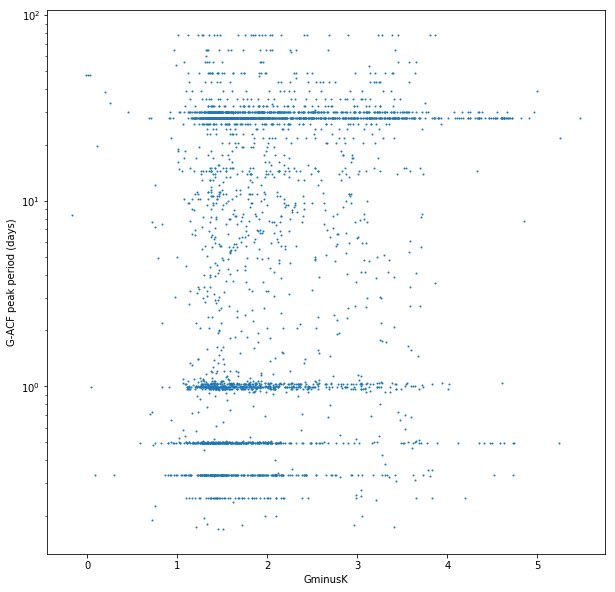

In [44]:
property_of_interest = 'GminusK'
periods = []
properties = []
s2n = []
objs = []
for obj in field:
    if obj.periods is not None and len(obj.periods) > 0:
        periods.append(obj.periods[0])
        s2n.append(obj.peak_signal_to_noise[0])
        objs.append(obj.obj)
        properties.append(eval("obj." + property_of_interest))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('G-ACF peak period (days)')
ax.set_xlabel(property_of_interest)
ax.set_yscale('log')
ax.scatter(properties, periods, s=1)
plt.show()

In [45]:
# clean up periods within certain ranges
threshold = 10.0 * TIME_CONVERSIONS['m2d']
print threshold
nice_periods = []
nice_properties = []
nice_objs = []
for i, p in enumerate(periods):
    if not np.any(np.abs(np.subtract(periods[:i:], p)) < threshold) and s2n[i] > 2.:
        nice_periods.append(p)
        nice_properties.append(properties[i])
        nice_objs.append(objs[i])
print "Number of periods {} -> {}".format(len(periods), len(nice_periods))

0.00694444444444
Number of periods 3314 -> 120


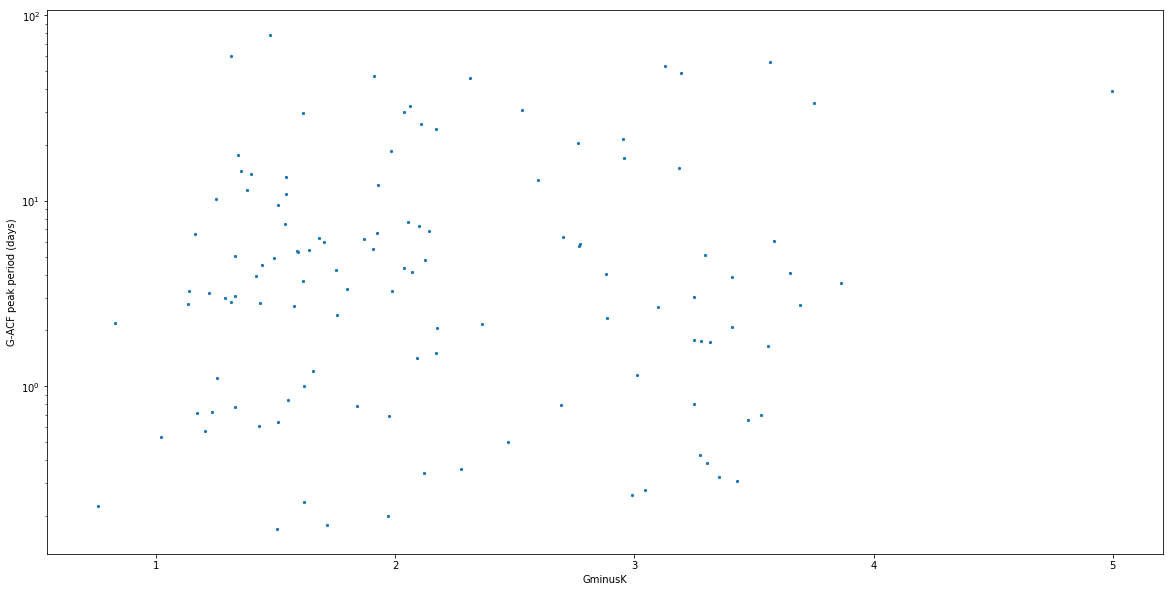

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel('G-ACF peak period (days)')
ax.set_xlabel(property_of_interest)
ax.set_yscale('log')
ax.scatter(nice_properties, nice_periods, s=5)
plt.show()

In [22]:
obj = field[field.objects.keys()[0]]

In [27]:
((obj.timeseries_binned[-1] - obj.timeseries_binned[0]) / obj.num_observations_binned) * TIME_CONVERSIONS['d2m']

120.89326583108239

In [47]:
for i in zip(nice_objs, nice_periods):
    print i

(16388, 0.4983536182935637)
(8209, 29.97792460493545)
(8228, 1.2102885219673531)
(2737, 14.433821181326227)
(16436, 2.189398960314468)
(16461, 0.3095414116431266)
(79, 30.672486029414987)
(9571, 32.476127699047126)
(8277, 1.1102948221553295)
(546, 1.0044164805203224)
(17766, 18.557760250007355)
(110, 77.94269792622308)
(114, 24.35704473845848)
(122, 25.980907028132027)
(4124, 6.837079683784386)
(16564, 38.97136006543248)
(16583, 13.438380899239935)
(204, 16.944054433842066)
(16662, 21.65073726224823)
(16668, 0.17070197595598113)
(8488, 0.27658823674903804)
(6878, 13.918329330991936)
(16696, 14.954263971151825)
(8558, 10.825370868827282)
(16794, 5.731072759842403)
(8603, 2.1651004200902317)
(16843, 48.69695202310822)
(8717, 4.23601075746073)
(16925, 4.017656292957018)
(16926, 10.25559441972038)
(16930, 3.3308813649246143)
(556, 0.3588519561732479)
(8775, 4.811269937238245)
(8749, 3.068610749921059)
(8811, 6.388736495620766)
(626, 5.338545591623815)
(8299, 7.6414351876438005)
(8306, 11.4

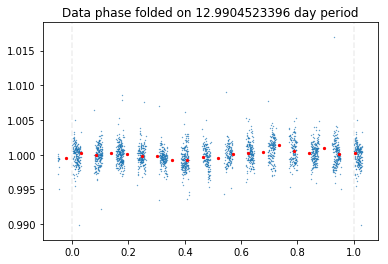

In [53]:
obj_id = 4249
field[obj_id].plot_phase_folded_lc(period=field[obj_id].periods[0], interactive=True)

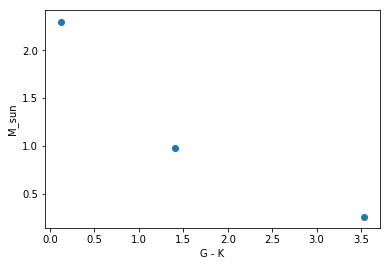

In [56]:
plt.scatter([0.125, 1.41, 3.533], [2.3, 0.98, 0.26])
plt.xlabel('G - K')
plt.ylabel('M_sun')
plt.show()